# Importing required libraries and datasets

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

# Petal width used as feature for training data
# Testing for class Iris-Virginica

In [2]:
X = iris["data"][:, 3:] #petal width
Y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

# Applying Logistic Regression

In [3]:
log_reg = LogisticRegression()

In [4]:
log_reg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Probability of prediced class to be Iris-Virginica

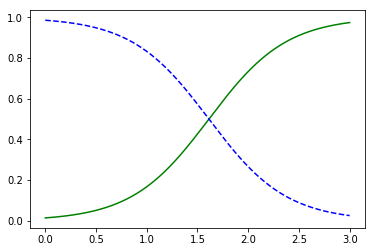

In [5]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
Y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, Y_proba[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, Y_proba[:, 0], "b--", label = "Not Iris-Virginica")

# Decision Boundary

# Using sepal length and sepal width as features

# Testing for class Setosa

In [6]:
X = iris["data"][:, 0:2] #Sepal length and Sepal Width
Y = (iris["target"] == 0).astype(np.int) # 1 if Setosa, else 0

# Applying Logistic Regression

In [7]:
log_reg = LogisticRegression()

In [8]:
log_reg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Plotting Decision Boundary

In [9]:
db_plot = figure(height=450, width=450)
db_plot.xaxis.axis_label = "Sepal_length"
db_plot.yaxis.axis_label = "Sepal_width"

not_Setosa = X[Y == 0]
Setosa = X[Y == 1]

In [10]:
db_plot.scatter(not_Setosa[:,0], not_Setosa[:,1], color="red", legend="Not Setosa")
db_plot.scatter(Setosa[:,0], Setosa[:,1], color = "blue", legend="Setosa")

GlyphRenderer(id='566d48cd-b1e0-464a-a7ab-49bcad650576', ...)

# Defining parameters theta (w0, w1, w2)

In [11]:
w0 = log_reg.intercept_
w1, w2 = log_reg.coef_[0]

In [12]:
A = np.array([4,8])
db_plot.line(A, (-w0-w1*A)/w2)

GlyphRenderer(id='117055b8-ea09-4fb4-b019-9e341db5c061', ...)

In [13]:
show(db_plot)

# Softmax Regression

# Using sepal length and width as features

In [14]:
X = iris["data"][:,(0,1)] #Sepal length and width
Y = iris["target"]

# Applying softmax regression

In [15]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# Making prediction for random value

In [25]:
softmax_reg.predict([[3,2]])

array([0])

In [17]:
softmax_reg.predict_proba([[5,2]])

array([[ 0.00538403,  0.93277955,  0.06183642]])

# Plotting Decision Boundary for Softmax Regression

In [20]:
step_size = 0.01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

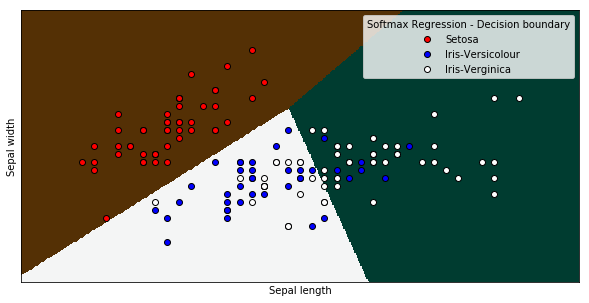

In [24]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.BrBG)
plt.scatter(X[0:49, 0], X[0:49, 1], color='r', edgecolors='k', label = "Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', edgecolors='k', label = "Iris-Versicolour")
plt.scatter(X[101:150, 0], X[101:150, 1], color='w', edgecolors='k', label = "Iris-Verginica")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(title = "Softmax Regression - Decision boundary")
plt.show()